![](https://databricks.com/wp-content/uploads/2018/12/PySpark-1024x164.png)

In [7]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 35 kB/s  eta 0:00:01    |████████                        | 71.2 MB 1.7 MB/s eta 0:02:07     |██████████▊                     | 94.5 MB 1.6 MB/s eta 0:02:00
     |████████████████████████████████| 199 kB 50.2 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845515 sha256=87cce77fbe77a647873edc9163632952059693b8981d3d0b885fa0c8435da90c
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


Here, the installation of pyspark is done

In [8]:
!python -m pip install findspark

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


#  **Create spark context**

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
spark = SparkSession.builder.getOrCreate()

In [45]:
from pyspark.sql import functions as fn

we imported all necessary libraries...

In [19]:
df = spark.read.csv('../input/credit-card-customers/BankChurners.csv', inferSchema=True, header=True)
df.describe().toPandas()

,summary,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,count,10127,10127,10127,10127,10127,10127,10127,10127,10127,...,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127
1,mean,7.391776063336625E8,None,46.32596030413745,None,2.3462032191172115,None,None,None,None,...,8631.953698034848,1162.8140614199665,7469.139636614887,0.7599406536980376,4404.086303939963,64.85869457884863,0.7122223758269962,0.2748935518909845,0.1599974639787803,0.8400025708403275
2,stddev,3.690378345023116E7,None,8.016814032549046,None,1.29890834890379,None,None,None,None,...,9088.776650223148,814.9873352357533,9090.685323679114,0.2192067692307027,3397.129253557085,23.47257044923301,0.23808609133294137,0.27569146925238736,0.36530101238046947,0.36530103711017936
3,min,708082083,Attrited Customer,26,F,0,College,Divorced,$120K +,Blue,...,1438.3,0,3.0,0.0,510,10,0.0,0.0,7.6642E-6,4.1998E-4
4,max,828343083,Existing Customer,73,M,5,Unknown,Unknown,Unknown,Silver,...,34516.0,2517,34516.0,3.397,18484,139,3.714,0.999,0.99958,0.99999


#  **Basic Spark operation**

In [20]:
df.columns

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

listed column names ...

# 1. Schema

In [21]:
df.printSchema()

root
 |-- CLIENTNUM: integer (nullable = true)
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (n

In [22]:
df.describe('Attrition_Flag').show(10)

+-------+-----------------+
|summary|   Attrition_Flag|
+-------+-----------------+
|  count|            10127|
|   mean|             null|
| stddev|             null|
|    min|Attrited Customer|
|    max|Existing Customer|
+-------+-----------------+



In [23]:
df.select('Attrition_Flag','Customer_Age').show(10)

+-----------------+------------+
|   Attrition_Flag|Customer_Age|
+-----------------+------------+
|Existing Customer|          45|
|Existing Customer|          49|
|Existing Customer|          51|
|Existing Customer|          40|
|Existing Customer|          40|
|Existing Customer|          44|
|Existing Customer|          51|
|Existing Customer|          32|
|Existing Customer|          37|
|Existing Customer|          48|
+-----------------+------------+
only showing top 10 rows



# How to find the mean of each age group in data?

In [24]:
df.groupby('Customer_Age').agg({'Total_Revolving_Bal': 'mean'}).show()

+------------+------------------------+
|Customer_Age|avg(Total_Revolving_Bal)|
+------------+------------------------+
|          31|      1098.7142857142858|
|          65|      1251.3168316831684|
|          53|      1227.6511627906978|
|          34|      1295.7808219178082|
|          28|      1006.6206896551724|
|          26|       1105.974358974359|
|          27|                 1175.75|
|          44|                1117.924|
|          47|      1139.0229645093946|
|          52|       1204.877659574468|
|          40|       1175.152354570637|
|          57|       1251.134529147982|
|          54|      1190.6091205211726|
|          48|       1130.175847457627|
|          64|      1161.7441860465117|
|          41|      1122.7625329815303|
|          43|      1155.6109936575053|
|          37|      1137.8653846153845|
|          61|      1209.9569892473119|
|          35|      1161.2173913043478|
+------------+------------------------+
only showing top 20 rows



In [25]:
df.groupby('Customer_Age').count().show()

+------------+-----+
|Customer_Age|count|
+------------+-----+
|          31|   91|
|          65|  101|
|          53|  387|
|          34|  146|
|          28|   29|
|          26|   78|
|          27|   32|
|          44|  500|
|          47|  479|
|          52|  376|
|          40|  361|
|          57|  223|
|          54|  307|
|          48|  472|
|          64|   43|
|          41|  379|
|          43|  473|
|          37|  260|
|          61|   93|
|          35|  184|
+------------+-----+
only showing top 20 rows



In this section we are grouping customer age count by using groupby function.

In [26]:
from pyspark.mllib.stat import Statistics

# select variables to check correlation
df_features = df.select("Customer_Age","Total_Trans_Amt","Total_Trans_Ct","Total_Revolving_Bal") 

# create RDD table for correlation calculation
rdd_table = df_features.rdd.map(lambda row: row[0:])

# get the correlation matrix
corr_mat=Statistics.corr(rdd_table, method="pearson")
corr_mat

array([[ 1.        , -0.04644649, -0.06709686,  0.01477989],
       [-0.04644649,  1.        ,  0.80719203,  0.06437048],
       [-0.06709686,  0.80719203,  1.        ,  0.05606049],
       [ 0.01477989,  0.06437048,  0.05606049,  1.        ]])

Here we checked for correlated features calculations for "Customer_Age","Total_Trans_Amt","Total_Trans_Ct","Total_Revolving_Bal"...

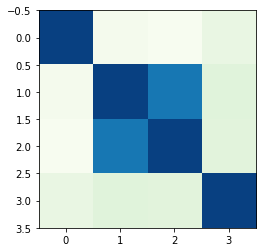

In [27]:
plt.imshow(corr_mat,cmap='GnBu')

 correlated features plotting...

# String and Numeric Columns

In [28]:
print('Data frame describe (string and numeric columns only):')
df.describe().toPandas()

Data frame describe (string and numeric columns only):


,summary,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,count,10127,10127,10127,10127,10127,10127,10127,10127,10127,...,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127
1,mean,7.391776063336625E8,None,46.32596030413745,None,2.3462032191172115,None,None,None,None,...,8631.953698034848,1162.8140614199665,7469.139636614887,0.7599406536980376,4404.086303939963,64.85869457884863,0.7122223758269962,0.2748935518909845,0.1599974639787803,0.8400025708403275
2,stddev,3.690378345023116E7,None,8.016814032549046,None,1.29890834890379,None,None,None,None,...,9088.776650223148,814.9873352357533,9090.685323679114,0.2192067692307027,3397.129253557085,23.47257044923301,0.23808609133294137,0.27569146925238736,0.36530101238046947,0.36530103711017936
3,min,708082083,Attrited Customer,26,F,0,College,Divorced,$120K +,Blue,...,1438.3,0,3.0,0.0,510,10,0.0,0.0,7.6642E-6,4.1998E-4
4,max,828343083,Existing Customer,73,M,5,Unknown,Unknown,Unknown,Silver,...,34516.0,2517,34516.0,3.397,18484,139,3.714,0.999,0.99958,0.99999


In [29]:
print(f'There are total {df.count()} row, Let print first 2 data rows:')
df.limit(2).toPandas()

There are total 10127 row, Let print first 2 data rows:


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


In [30]:
Months_on_book = df.groupBy('Months_on_book').count()

Total_Revolving_Bal = df.groupBy('Total_Revolving_Bal').count()

In [31]:
Months = pd.DataFrame(Months_on_book.rdd.map(lambda line: line.asDict()).collect()).head(20)
Revolving_Bal = pd.DataFrame(Total_Revolving_Bal.rdd.map(lambda line: line.asDict()).collect()).head(20)

In [32]:
Months.head(10)
Revolving_Bal.head(10)

,Total_Revolving_Bal,count
0,1580,8
1,1591,6
2,1829,8
3,1645,2
4,1342,5
5,1959,3
6,1088,4
7,1238,2
8,471,1
9,2142,2


## How to Filter Certain Values of a Column

In [42]:
df.where("Customer_Age = 45").where("Gender='M'").where("Education_Level = 'Graduate'").toPandas()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,827111283,Existing Customer,45,M,3,Graduate,Single,$80K - $120K,Blue,41,...,32426.0,578,31848.0,1.042,1109,28,0.474,0.018,0.000118,0.99988
1,714107958,Existing Customer,45,M,1,Graduate,Single,$40K - $60K,Blue,36,...,6576.0,0,6576.0,0.579,1465,34,0.619,0.000,0.000343,0.99966
2,772629333,Existing Customer,45,M,3,Graduate,Married,$40K - $60K,Blue,35,...,3454.0,1200,2254.0,0.597,1313,30,0.304,0.347,0.000226,0.99977
3,714511758,Existing Customer,45,M,4,Graduate,Single,$80K - $120K,Blue,40,...,6363.0,1029,5334.0,0.838,1542,16,1.286,0.162,0.000070,0.99993
4,719211558,Attrited Customer,45,M,2,Graduate,Single,$60K - $80K,Blue,36,...,3401.0,0,3401.0,0.898,744,18,1.000,0.000,0.982170,0.01783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,826148883,Existing Customer,45,M,2,Graduate,Married,$120K +,Blue,41,...,16453.0,1660,14793.0,0.629,14762,108,0.742,0.101,0.000108,0.99989
76,755305683,Existing Customer,45,M,5,Graduate,Married,$60K - $80K,Blue,38,...,8983.0,0,8983.0,0.713,15163,124,0.746,0.000,0.000163,0.99984
77,715090008,Existing Customer,45,M,4,Graduate,Single,$60K - $80K,Silver,36,...,28564.0,2517,26047.0,0.711,14875,107,0.783,0.088,0.000489,0.99951
78,713768358,Existing Customer,45,M,4,Graduate,Single,$40K - $60K,Blue,35,...,7935.0,888,7047.0,0.779,15380,122,0.694,0.112,0.000119,0.99988


## How to Add a New Column to the Dataframe

I want to add a new column with a constant value of 0 to the dataframe

In [46]:
df = df.withColumn("new_column", fn.lit(0))

In [47]:
df.toPandas()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,new_column
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,0
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,0


## Count Distinct Items in a Column

How many distinct education levels are there in the column 'Education_Level'?

In [48]:
df.select(fn.countDistinct("Education_Level")).show()

+-------------------------------+
|count(DISTINCT Education_Level)|
+-------------------------------+
|                              7|
+-------------------------------+

